# Step 1. Import Data

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [51]:
# Link to files - https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P39-Fashion-MNIST-Datasets.zip
fashion_train_df = pd.read_csv('P39-Fashion-MNIST-Datasets/fashion-mnist_train.csv', sep=',')

In [9]:
fashion_test_df = pd.read_csv('P39-Fashion-MNIST-Datasets/fashion-mnist_test.csv', sep=',')

# Step 2. Visual EDA

In [10]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [14]:
fashion_train_df.shape

(60000, 785)

In [15]:
fashion_test_df.shape

(10000, 785)

In [16]:
training = np.array(fashion_train_df, dtype='float32')

In [17]:
testing = np.array(fashion_test_df, dtype='float32')

8.0

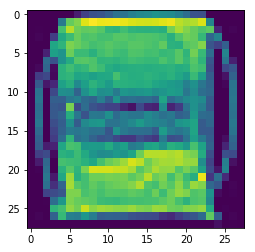

In [18]:
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

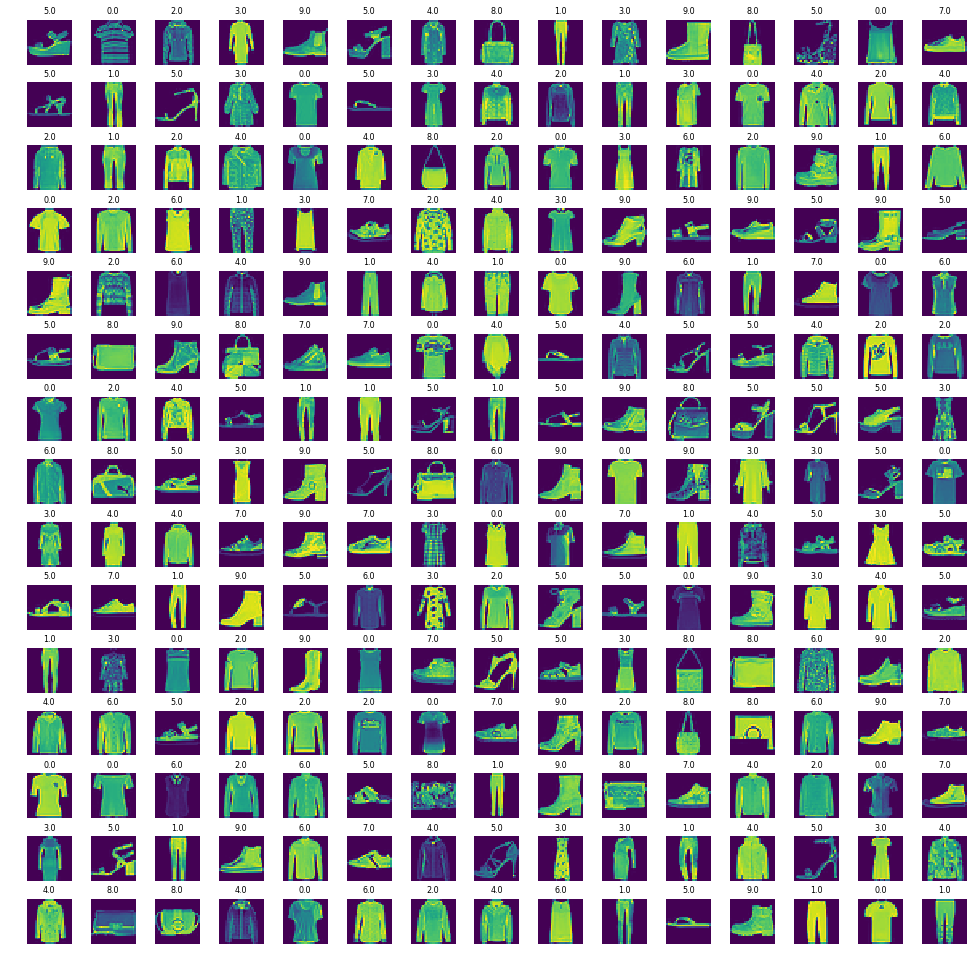

In [19]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
    index = random.randint(1,60000)
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0], fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [20]:
# Decoding 10 classes
# 0 - T-shirt/top
# 1 - Trouser
# 2 - Pullover
# 3 - Dress
# 4 - Coat
# 5 - Sandal
# 6 - Shirt
# 7 - Sneaker
# 8 - Bag
# 9 - Ankle boot

# Step 3. Training the Model

In [21]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [22]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [23]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [24]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [25]:
print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


In [30]:
cnn_model = Sequential()

In [31]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28,28,1), activation = 'relu'))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [32]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [33]:
cnn_model.add(Flatten())

In [34]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [35]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [36]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [39]:
epochs = 3

In [40]:
cnn_model.fit(X_train, 
              y_train, 
              batch_size = 512,
             nb_epoch = epochs,
             verbose = 1,
             validation_data= (X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
  512/48000 [..............................] - ETA: 12s - loss: 0.3989 - accuracy: 0.8496

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


48000/48000 [==============================] - 14s 301us/step - loss: 0.3953 - accuracy: 0.8614 - val_loss: 0.3945 - val_accuracy: 0.8642
Epoch 2/3
48000/48000 [==============================] - 13s 281us/step - loss: 0.3730 - accuracy: 0.8717 - val_loss: 0.3690 - val_accuracy: 0.8720
Epoch 3/3
48000/48000 [==============================] - 15s 322us/step - loss: 0.3620 - accuracy: 0.8742 - val_loss: 0.3602 - val_accuracy: 0.8767


# Step 4. Evaluate Model

In [41]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 2s 190us/step
Test Accuracy: 0.878


In [42]:
predicted_classes = cnn_model.predict_classes(X_test)

In [43]:
predicted_classes

array([0, 1, 6, ..., 8, 8, 1])

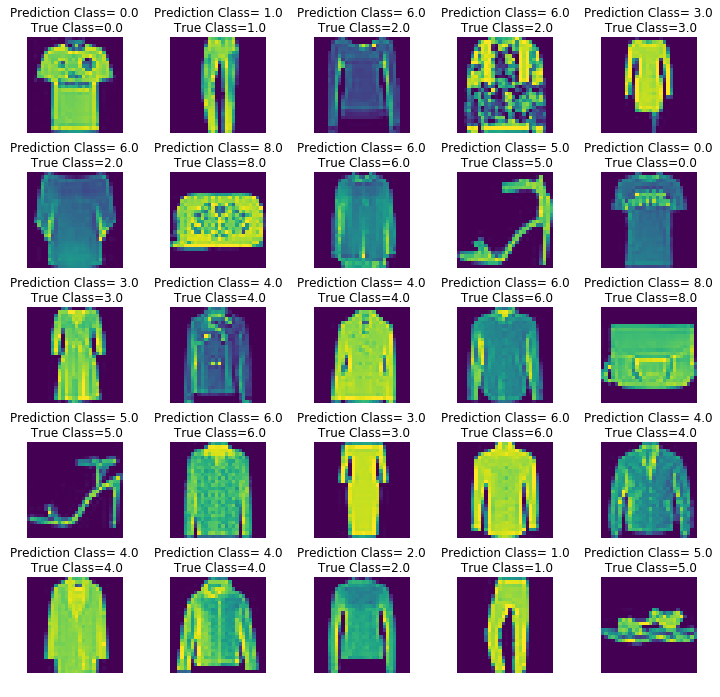

In [44]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in range(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class= {:0.1f}\n True Class={:0.1f}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [45]:
# Decoding 10 classes
# 0 - T-shirt/top
# 1 - Trouser
# 2 - Pullover
# 3 - Dress
# 4 - Coat
# 5 - Sandal
# 6 - Shirt
# 7 - Sneaker
# 8 - Bag
# 9 - Ankle boot

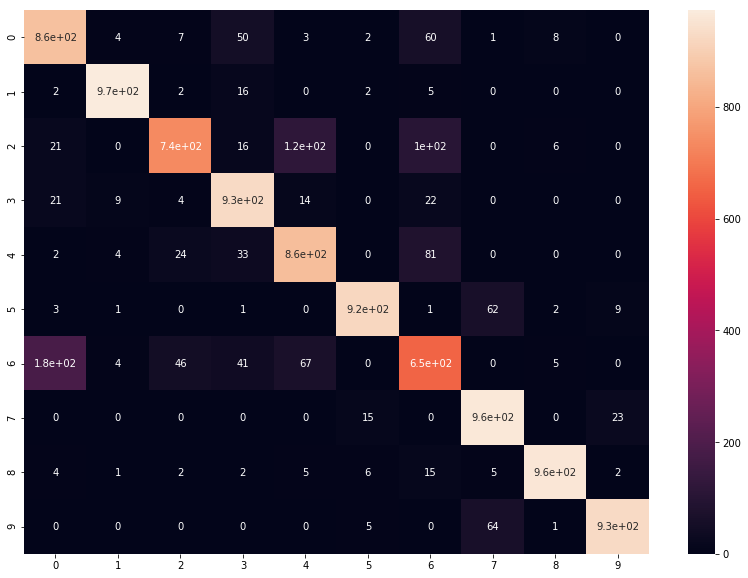

In [47]:
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [48]:
cm

array([[865,   4,   7,  50,   3,   2,  60,   1,   8,   0],
       [  2, 973,   2,  16,   0,   2,   5,   0,   0,   0],
       [ 21,   0, 735,  16, 118,   0, 104,   0,   6,   0],
       [ 21,   9,   4, 930,  14,   0,  22,   0,   0,   0],
       [  2,   4,  24,  33, 856,   0,  81,   0,   0,   0],
       [  3,   1,   0,   1,   0, 921,   1,  62,   2,   9],
       [183,   4,  46,  41,  67,   0, 654,   0,   5,   0],
       [  0,   0,   0,   0,   0,  15,   0, 962,   0,  23],
       [  4,   1,   2,   2,   5,   6,  15,   5, 958,   2],
       [  0,   0,   0,   0,   0,   5,   0,  64,   1, 930]])

In [50]:
num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.79      0.86      0.82      1000
     Class 1       0.98      0.97      0.97      1000
     Class 2       0.90      0.73      0.81      1000
     Class 3       0.85      0.93      0.89      1000
     Class 4       0.81      0.86      0.83      1000
     Class 5       0.97      0.92      0.94      1000
     Class 6       0.69      0.65      0.67      1000
     Class 7       0.88      0.96      0.92      1000
     Class 8       0.98      0.96      0.97      1000
     Class 9       0.96      0.93      0.95      1000

   micro avg       0.88      0.88      0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

